<a href="https://colab.research.google.com/github/rajneeshmehta/facerecog/blob/master/MlOps_Task_4_Face_Recog_VGG_16_From_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#download the code and remove the extra files and folder
!git clone https://github.com/rajneeshmehta/facerecog.git 
!rm -f /content/facerecog/README.md
!rm -fr /content/facerecog/.git
!mv /content/facerecog/Olivia\ Thirlby /content/facerecog/OliviaThirlby
!mv /content/facerecog/Rebecca\ Hall /content/facerecog/RebeccaHall
!mv /content/facerecog/Nicole\ Polizzi /content/facerecog/NicolePolizzi 
!mv /content/facerecog/Rita\ Moreno /content/facerecog/RitaMoreno
!mv /content/facerecog/Robert\ Downey\ Jr. /content/facerecog/RobertDowneyJr.

Cloning into 'facerecog'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 5988 (delta 29), reused 0 (delta 0), pack-reused 5932
Receiving objects: 100% (5988/5988), 1.08 GiB | 15.49 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Checking out files: 100% (3895/3895), done.


In [ ]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import Model
from keras.layers import Dense, Flatten, Dropout , ReLU
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
img_rows = 224
img_cols = 224 
model = VGG16(
            include_top=False,
            weights="imagenet",
            input_shape=(img_rows,img_cols,3),
)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable = False
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
newmodel = model.output
newmodel = Flatten(name = "flatten")(newmodel)
newmodel = Dense(256 , activation='relu')(newmodel)
newmodel = Dropout(0.5)(newmodel)
# newmodel = MaxPooling2D()(newmodel)
# newmodel = Dense(16 , activation='relu')(newmodel)
newmodel = Dense(5 , activation='softmax')(newmodel)
newmodel = Model(inputs=model.input , outputs = newmodel )
newmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
newmodel.compile(RMSprop(lr = 0.001),
loss="categorical_crossentropy",
metrics=['accuracy'],
)

In [ ]:
DataGen = ImageDataGenerator(
    # featurewise_center = True,
    samplewise_center = True,
    # featurewise_std_normalization=True,
    samplewise_std_normalization = True,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale=1/255,
    validation_split=0.2
)

trainData = DataGen.flow_from_directory(
    "/content/facerecog/",
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=9412945
)

valData = DataGen.flow_from_directory(
    "/content/facerecog/",
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=9412945
)


Found 3894 images belonging to 5 classes.
Found 3894 images belonging to 5 classes.


In [ ]:
checkpoint = ModelCheckpoint("face_VGG16.h5",
                             monitor="val_accuracy",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_accuracy', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [ ]:
# newmodel.fit_generator(
#     trainData,
#     epochs=20,
#     use_multiprocessing=True
# )
nb_train_samples = 3894
epochs = 30
batch_size = 512
history = newmodel.fit_generator(
    trainData,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = valData,
    validation_steps = nb_train_samples // batch_size,
    use_multiprocessing = True
)


Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 1.4632 - accuracy: 0.3393WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.

Epoch 00001: val_accuracy did not improve from 0.27292
7/7 [==============================] - 17s 2s/step - loss: 1.4632 - accuracy: 0.3393 - val_loss: 1.3593 - val_accuracy: 0.3973
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 1.4721 - accuracy: 0.3884WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00002: val_accuracy did not improve from 0.27292
7/7 [==============================] - 26s 4s/step - loss: 1.4721 - accuracy: 0.3884 - val_loss: 1.3382 - val_accuracy: 0.4286
Epoch 3/30
3/7 [===========>..................] - ETA: 5s - loss: 1.4257 - accuracy: 0.3854

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7/7 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.3929WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00003: val_accuracy did not improve from 0.27292
7/7 [==============================] - 24s 3s/step - loss: 1.3983 - accuracy: 0.3929 - val_loss: 1.3623 - val_accuracy: 0.4420
Epoch 4/30
4/7 [================>.............] - ETA: 4s - loss: 1.5495 - accuracy: 0.3516

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7/7 [==============================] - ETA: 0s - loss: 1.4524 - accuracy: 0.3795WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.

Epoch 00004: val_accuracy did not improve from 0.27292
7/7 [==============================] - 28s 4s/step - loss: 1.4524 - accuracy: 0.3795 - val_loss: 1.3909 - val_accuracy: 0.3750
Epoch 5/30
7/7 [==============================] - ETA: 0s - loss: 1.5037 - accuracy: 0.3571WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.

Epoch 00005: val_accuracy did not improve from 0.27292
7/7 [==============================] - 24s 3s/step - loss: 1.5037 - accuracy: 0.3571 - val_loss: 1.3285 - val_accuracy: 0.4688
Epoch 6/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/7 [=======>......................] - ETA: 6s - loss: 1.3417 - accuracy: 0.4062

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7/7 [==============================] - ETA: 0s - loss: 1.4077 - accuracy: 0.3839WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.

Epoch 00006: val_accuracy did not improve from 0.27292
7/7 [==============================] - 26s 4s/step - loss: 1.4077 - accuracy: 0.3839 - val_loss: 1.2520 - val_accuracy: 0.5045
Epoch 7/30
7/7 [==============================] - ETA: 0s - loss: 1.4588 - accuracy: 0.3271WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.

Epoch 00007: val_accuracy did not improve from 0.27292
7/7 [==============================] - 27s 4s/step - loss: 1.4588 - accuracy: 0.3271 - val_loss: 1.3148 - val_accuracy: 0.5045
Epoch 8/30


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7/7 [==============================] - ETA: 0s - loss: 1.3882 - accuracy: 0.3616WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00008: val_accuracy did not improve from 0.27292
7/7 [==============================] - 26s 4s/step - loss: 1.3882 - accuracy: 0.3616 - val_loss: 1.2940 - val_accuracy: 0.4866
Epoch 9/30
2/7 [=======>......................] - ETA: 7s - loss: 1.5095 - accuracy: 0.3438

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7/7 [==============================] - ETA: 0s - loss: 1.4487 - accuracy: 0.3571WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.
Restoring model weights from the end of the best epoch.

Epoch 00009: val_accuracy did not improve from 0.27292
7/7 [==============================] - 24s 3s/step - loss: 1.4487 - accuracy: 0.3571 - val_loss: 1.3490 - val_accuracy: 0.5000
Epoch 00009: early stopping


In [ ]:
newmodel.save("face-VGG16.h5")

In [ ]:
from keras.models import load_model

classifier = load_model('face-VGG16.h5')

In [ ]:
 from google.colab.patches import cv2_imshow

Class - RitaMoreno


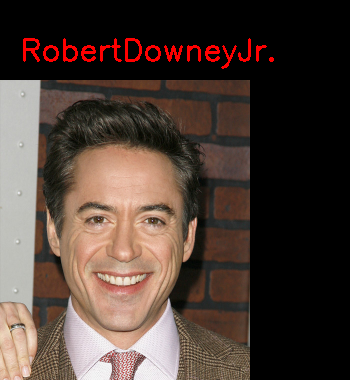

Class -  NicolePolizzi 


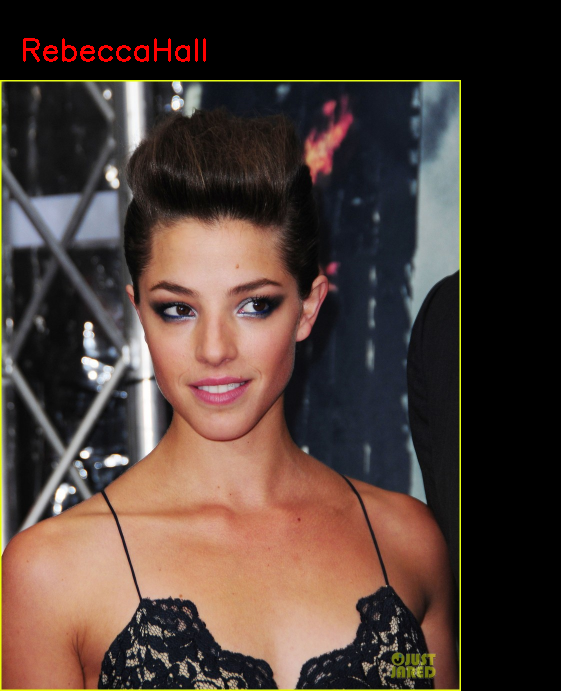

Class -  NicolePolizzi 


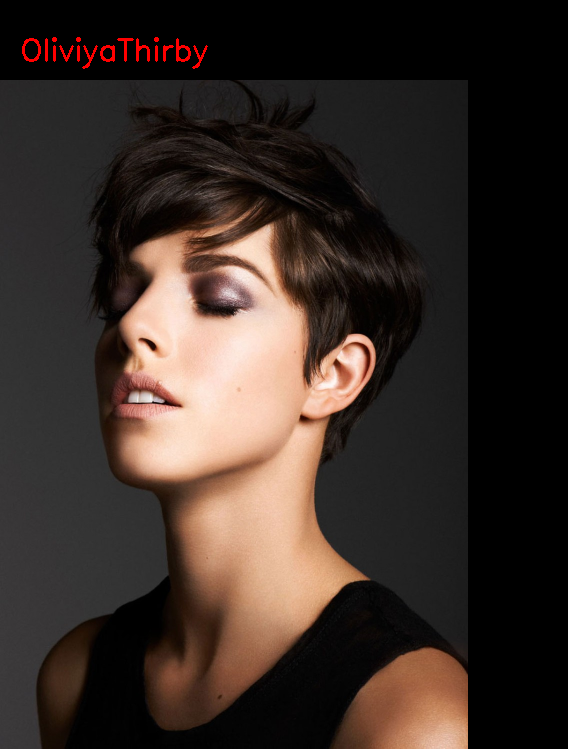

Class - RebeccaHall


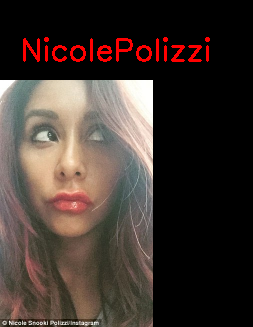

Class - RitaMoreno


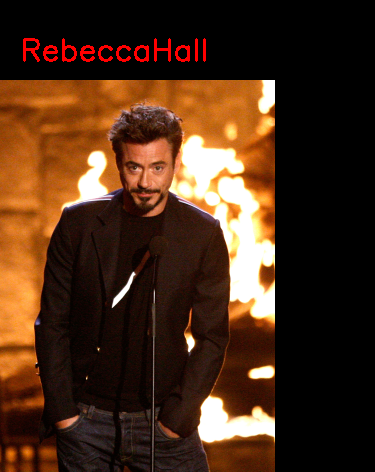

Class - RobertDowneyJr.


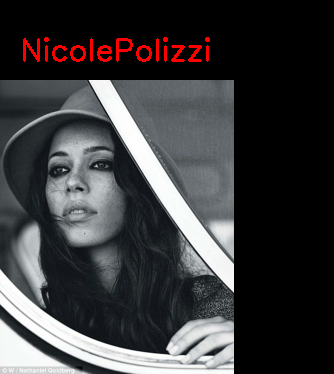

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

celebrity_dict = {
                      0: "NicolePolizzi ", 
                      1: "OliviyaThirby",
                      2: "RebeccaHall",
                      3: "RitaMoreno",
                      4: "RobertDowneyJr.",
                      
                     }

celebrity_dict_n = {
                       0: " NicolePolizzi ", 
                       1: "OliviyaThirby",
                       2: "RebeccaHall",
                       3: "RitaMoreno",
                       4: "RobertDowneyJr.",
                       
                       }

def draw_test(name, pred, im):
    celeb = celebrity_dict[pred[0]]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, celeb, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + celebrity_dict_n[random_directory])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,6):
    input_im = getRandomImage("/content/facerecog/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()